# 🚝 Adam (Batch - Mini-Batch) Algorithm Multivariable

### Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import random

### Read Data

In [2]:
data = np.genfromtxt('MultipleLR.csv', delimiter=',')
x  = data[:,0:3]
x2 = np.ones(len(x))
y  = data[:,3]

X = np.insert(x, 0, x2, axis=1)
y = y.reshape(25,1)

In [3]:
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [4]:
Theta = np.zeros(4).reshape(4,1)
Theta

array([[0.],
       [0.],
       [0.],
       [0.]])

## Adam Batch Version

In [5]:
def Adam_Multi_Batch(X, y, alpha, beta1, beta2, epochs):
    
    m = len(X) 
    all_loss, all_thetas = [] , []
    
    ## Multivariable
    Theta = np.zeros(4).reshape(4,1)
    
    ## Adam
    beta1 = 0.9
    beta2 = 0.999
    last_vt, last_mt = 0, 0
    epselon = 10**-8
    
    for i in range(epochs):
        
        # Hypothesis 
        y_hat  = X@(Theta)

        loss = sum( np.square(y_hat - y) ) /(2*m)

        # Add previous thetas and loss 
        all_loss.append(loss)
        all_thetas.append(Theta)

        # Gradient thetas
        g_theta =  X.transpose().dot(y_hat - y) / m

        # Update mt based on beta 1 
        mt = beta1 * last_mt + (1-beta1) * (g_theta)

        # Update vt based on beta2 -- square
        vt = beta2 * last_vt + (1-beta2) * np.square(g_theta)

        # Bias Correction 
        mt_corrected = mt / (1-beta1**(i+1))
        vt_corrected = vt / (1-beta2**(i+1))

        # Update thetas based on vts and mts
        Theta = Theta - (alpha * (mt_corrected / ( np.sqrt(vt_corrected) + epselon) ) )

        last_vt = vt
        last_mt = mt
        
        
        #Stopping using gradient
        if np.linalg.norm(g_theta)  < 0.0001:
            break

        # Stopping using loss
        if (i > 0) and (abs(all_loss[i-1] - all_loss[i])) < 0.01:
            break

#         # Stopping using theta
#         if (i > 0) and ( ( np.linalg.norm([all_thetas[i]]) 
#                             - np.linalg.norm([all_thetas[i-1]])) < 0.0001):
#             break

    print(f"After {i+1} Epochs\n")
    print(f"Theta: {Theta}")
    print(f"loss: {loss}\n")
    print(f"Y_Hat: \n{y_hat}\n")
    print(f"Y: \n{y}")
    
    return (all_thetas, all_loss, y_hat, loss, Theta, i)

all_thetas, all_loss, y_hat, loss, Theta, num_iterations \
= Adam_Multi_Batch(X, y, 0.01, 0.9, 0.999, 1000)


After 146 Epochs

Theta: [[0.67150058]
 [0.67128175]
 [0.67120906]
 [0.6728477 ]]
loss: [6.05143784]

Y_Hat: 
[[153.80222134]
 [184.70205212]
 [182.01263233]
 [198.13501977]
 [141.04376966]
 [104.10912766]
 [148.43658209]
 [110.15642309]
 [172.61747188]
 [159.86329   ]
 [143.06154389]
 [141.05001176]
 [188.05418694]
 [156.48371318]
 [149.1093406 ]
 [187.39118546]
 [149.09377115]
 [177.99046618]
 [179.32181314]
 [160.51653446]
 [173.95925914]
 [173.2868587 ]
 [165.89802961]
 [155.13812455]
 [191.41622201]]

Y: 
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


##### R2 Score

In [6]:
# Score
r2_score(y, y_hat)

0.9781929539401717

###### Plots

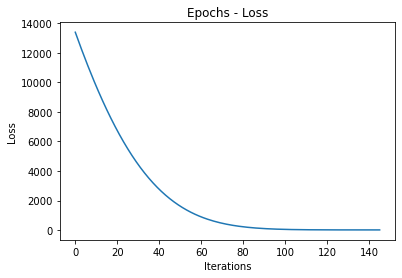

In [7]:
# epochs - loss
plt.plot(all_loss)
plt.title('Epochs - Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

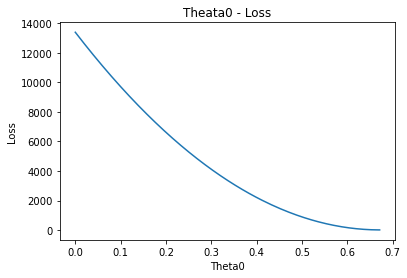

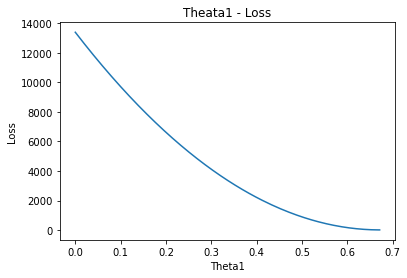

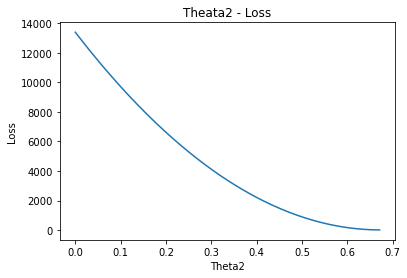

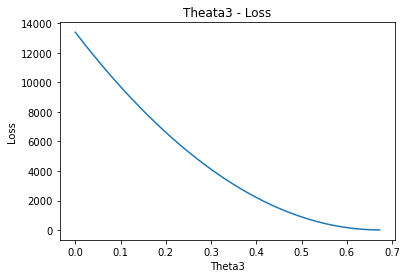

In [8]:
# Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.)
thata0 = []
thata1 = []
thata2 = []
thata3 = []

for i in range(0, len(all_thetas)):
    thata0.append(all_thetas[i][0])
    thata1.append(all_thetas[i][1])
    thata2.append(all_thetas[i][2])
    thata3.append(all_thetas[i][3])
    
plt.plot(thata0, all_loss)
plt.title('Theata0 - Loss')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.show()

plt.plot(thata1, all_loss)
plt.title('Theata1 - Loss')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.show()

plt.plot(thata2, all_loss)
plt.title('Theata2 - Loss')
plt.xlabel('Theta2')
plt.ylabel('Loss')
plt.show()

plt.plot(thata3, all_loss)
plt.title('Theata3 - Loss')
plt.xlabel('Theta3')
plt.ylabel('Loss')
plt.show()

## Adam Mini-Batch Version

In [9]:
def Adam_Multi_Mini(x, y, alpha, beta1, beta2, epochs, b):
    m = len(X) 
    all_loss, all_thetas = [] , []
    ## Multivariable
    Theta = np.zeros(4).reshape(4,1)
    
    ## Mini Batch
    final_list = lambda X, l: [X[i:i+l] for i in range(0, len(X), l)]
    # Choose b random samples from our exampels
    x_batches = final_list(X, b)
    y_batches = final_list(y, b)
    
    ## Adam
    beta1 = 0.9
    beta2 = 0.999
    last_vt, last_mt = 0, 0
    epselon = 10**-8
    
    for i in range(epochs):
        for j in range(len(x_batches)):
        
            y_hat  = x_batches[j]@(Theta)

            loss = sum( np.square(y_hat - y_batches[j]) ) /(2*m)

            # Add previous thetas and loss 
            all_loss.append(loss)
            all_thetas.append(Theta)

            # Gradient thetas
            g_theta =  x_batches[j].transpose().dot(y_hat - y_batches[j]) / m

            # Update mt based on beta 1 
            mt = beta1 * last_mt + (1-beta1) * (g_theta)
            
            # Update vt based on beta2 -- square
            vt = beta2 * last_vt + (1-beta2) * np.square(g_theta)
            
            # Bias Correction 
            mt_corrected = mt / (1-beta1**(i+1))
            vt_corrected = vt / (1-beta2**(i+1))
            
            # Update thetas based on vts and mts
            Theta = Theta - (alpha * (mt_corrected / ( np.sqrt(vt_corrected) + epselon) ) )
            
            last_vt = vt
            last_mt = mt
        
        y_hat = X@(Theta)
        
        
#         # Stopping using gradient
#         if np.linalg.norm([g_theta])  < 0.001:
#             break

        # Stopping using loss - I just forgot the abs 
        if (i > 0) and (abs(all_loss[i-1] - all_loss[i])) < 1:
            break

#         # Stopping using theta
#         if (i > 0) and ( ( np.linalg.norm([all_thetas[i]]) 
#                             - np.linalg.norm([all_thetas[i-1]])) < 0.0001):
#             break

    print(f"After {i+1} Epochs\n")
    print(f"Theta: {Theta}")
    print(f"loss: {loss}\n")
    print(f"Y_Hat: \n{y_hat}\n")
    print(f"Y: \n{y}")
    
    return (all_thetas, all_loss, y_hat, loss, Theta, i)

all_thetas, all_loss, y_hat, loss, Theta, num_iterations \
= Adam_Multi_Mini(X, y, 0.01, 0.9, 0.999, 1000, 5)


After 43 Epochs

Theta: [[0.67275436]
 [0.66760592]
 [0.66666357]
 [0.67119856]]
loss: [3.01405631]

Y_Hat: 
[[153.08096396]
 [183.84796498]
 [181.16393632]
 [197.21580834]
 [140.39168119]
 [103.63831305]
 [147.752956  ]
 [109.65530603]
 [171.82876167]
 [159.14554509]
 [142.40150748]
 [140.40699412]
 [187.17221283]
 [155.74420234]
 [148.42509692]
 [186.52822423]
 [148.38728577]
 [177.1700211 ]
 [178.47819972]
 [159.76138138]
 [173.15737706]
 [172.4899479 ]
 [165.13096987]
 [154.39897817]
 [190.52649769]]

Y: 
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


###### R2 Score

In [10]:
r2_score(y, y_hat)

0.9766773897510416

###### Plots

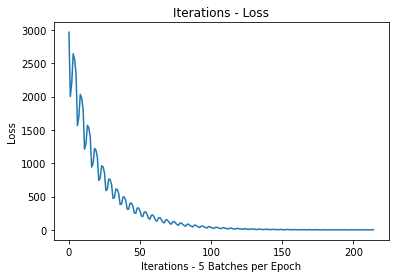

In [11]:
# epochs - loss
plt.plot(all_loss)
plt.title('Iterations - Loss')
plt.xlabel('Iterations - 5 Batches per Epoch')
plt.ylabel('Loss')
plt.show()

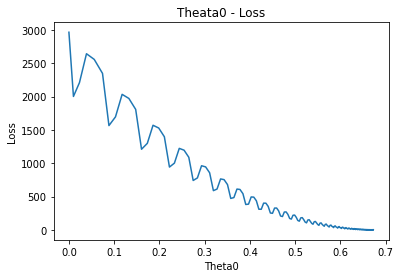

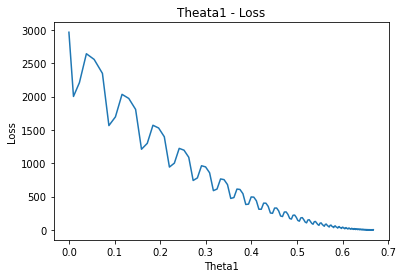

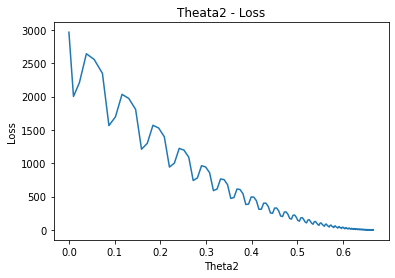

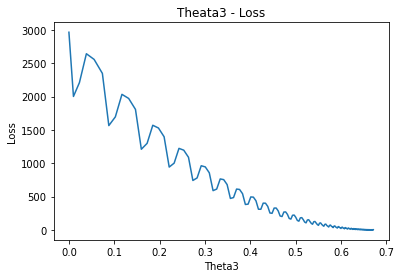

In [12]:
# Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.)
thata0 = []
thata1 = []
thata2 = []
thata3 = []

for i in range(0, len(all_thetas)):
    thata0.append(all_thetas[i][0])
    thata1.append(all_thetas[i][1])
    thata2.append(all_thetas[i][2])
    thata3.append(all_thetas[i][3])
    
plt.plot(thata0, all_loss)
plt.title('Theata0 - Loss')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.show()

plt.plot(thata1, all_loss)
plt.title('Theata1 - Loss')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.show()

plt.plot(thata2, all_loss)
plt.title('Theata2 - Loss')
plt.xlabel('Theta2')
plt.ylabel('Loss')
plt.show()

plt.plot(thata3, all_loss)
plt.title('Theata3 - Loss')
plt.xlabel('Theta3')
plt.ylabel('Loss')
plt.show()